# A K-NEAREST NEIGHBORS MODEL FOR CLASSIFYING THE BREAST CANCER WISCONSIN DATASET

Author: UBANDIYA Najib Yusuf, MLE

Import necessary libraries and the dataset (from sklearn)

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

Load the dataset

In [102]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# A quick EDA

In [103]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [104]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Check for skewness

In [106]:
df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

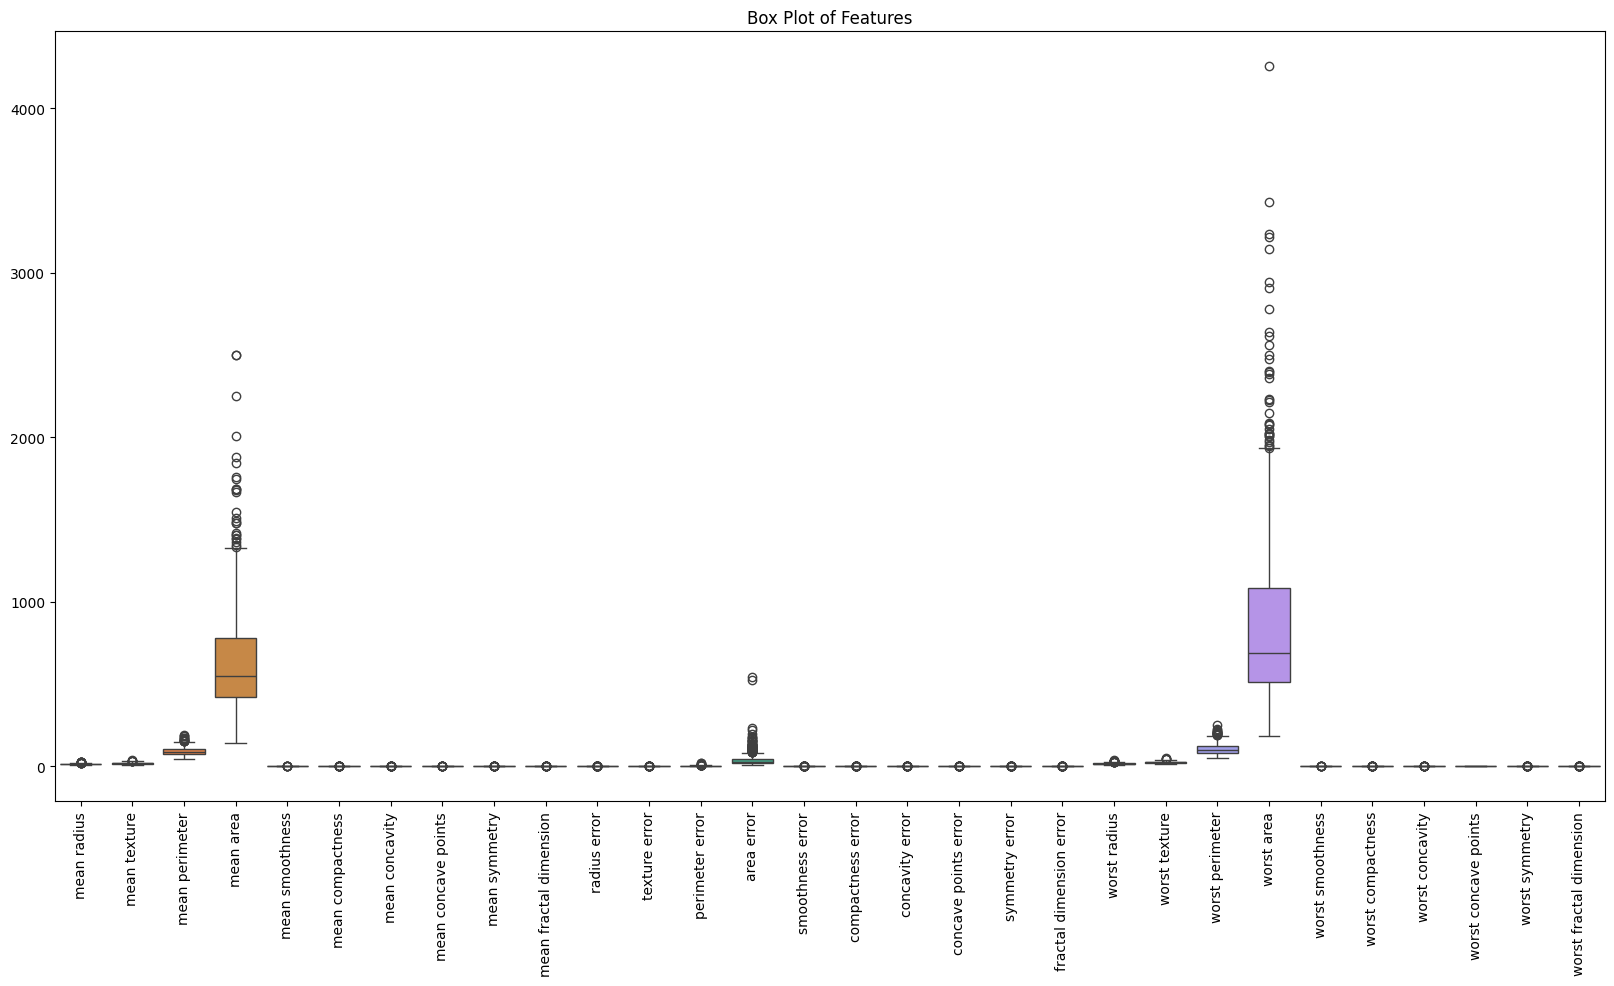

In [107]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop('target', axis=1))
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()

In [108]:
z_scores = stats.zscore(df.drop('target', axis=1))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
df_outliers = df[outliers]
df = df[~outliers]

Selecting the best features (columns) to work with

In [109]:
features = df.drop(columns='target')
targets = df['target']

In [110]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit(features, targets)
print(f'Selected features: {features.columns[selector.get_support()]}')

Selected features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')


In [111]:
X = df[['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
        'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points']]
y = df['target'].map({0: 'No cancer', 1: 'Cancer'})

# Visualising the selected data

1. Pairplot for feature relationships

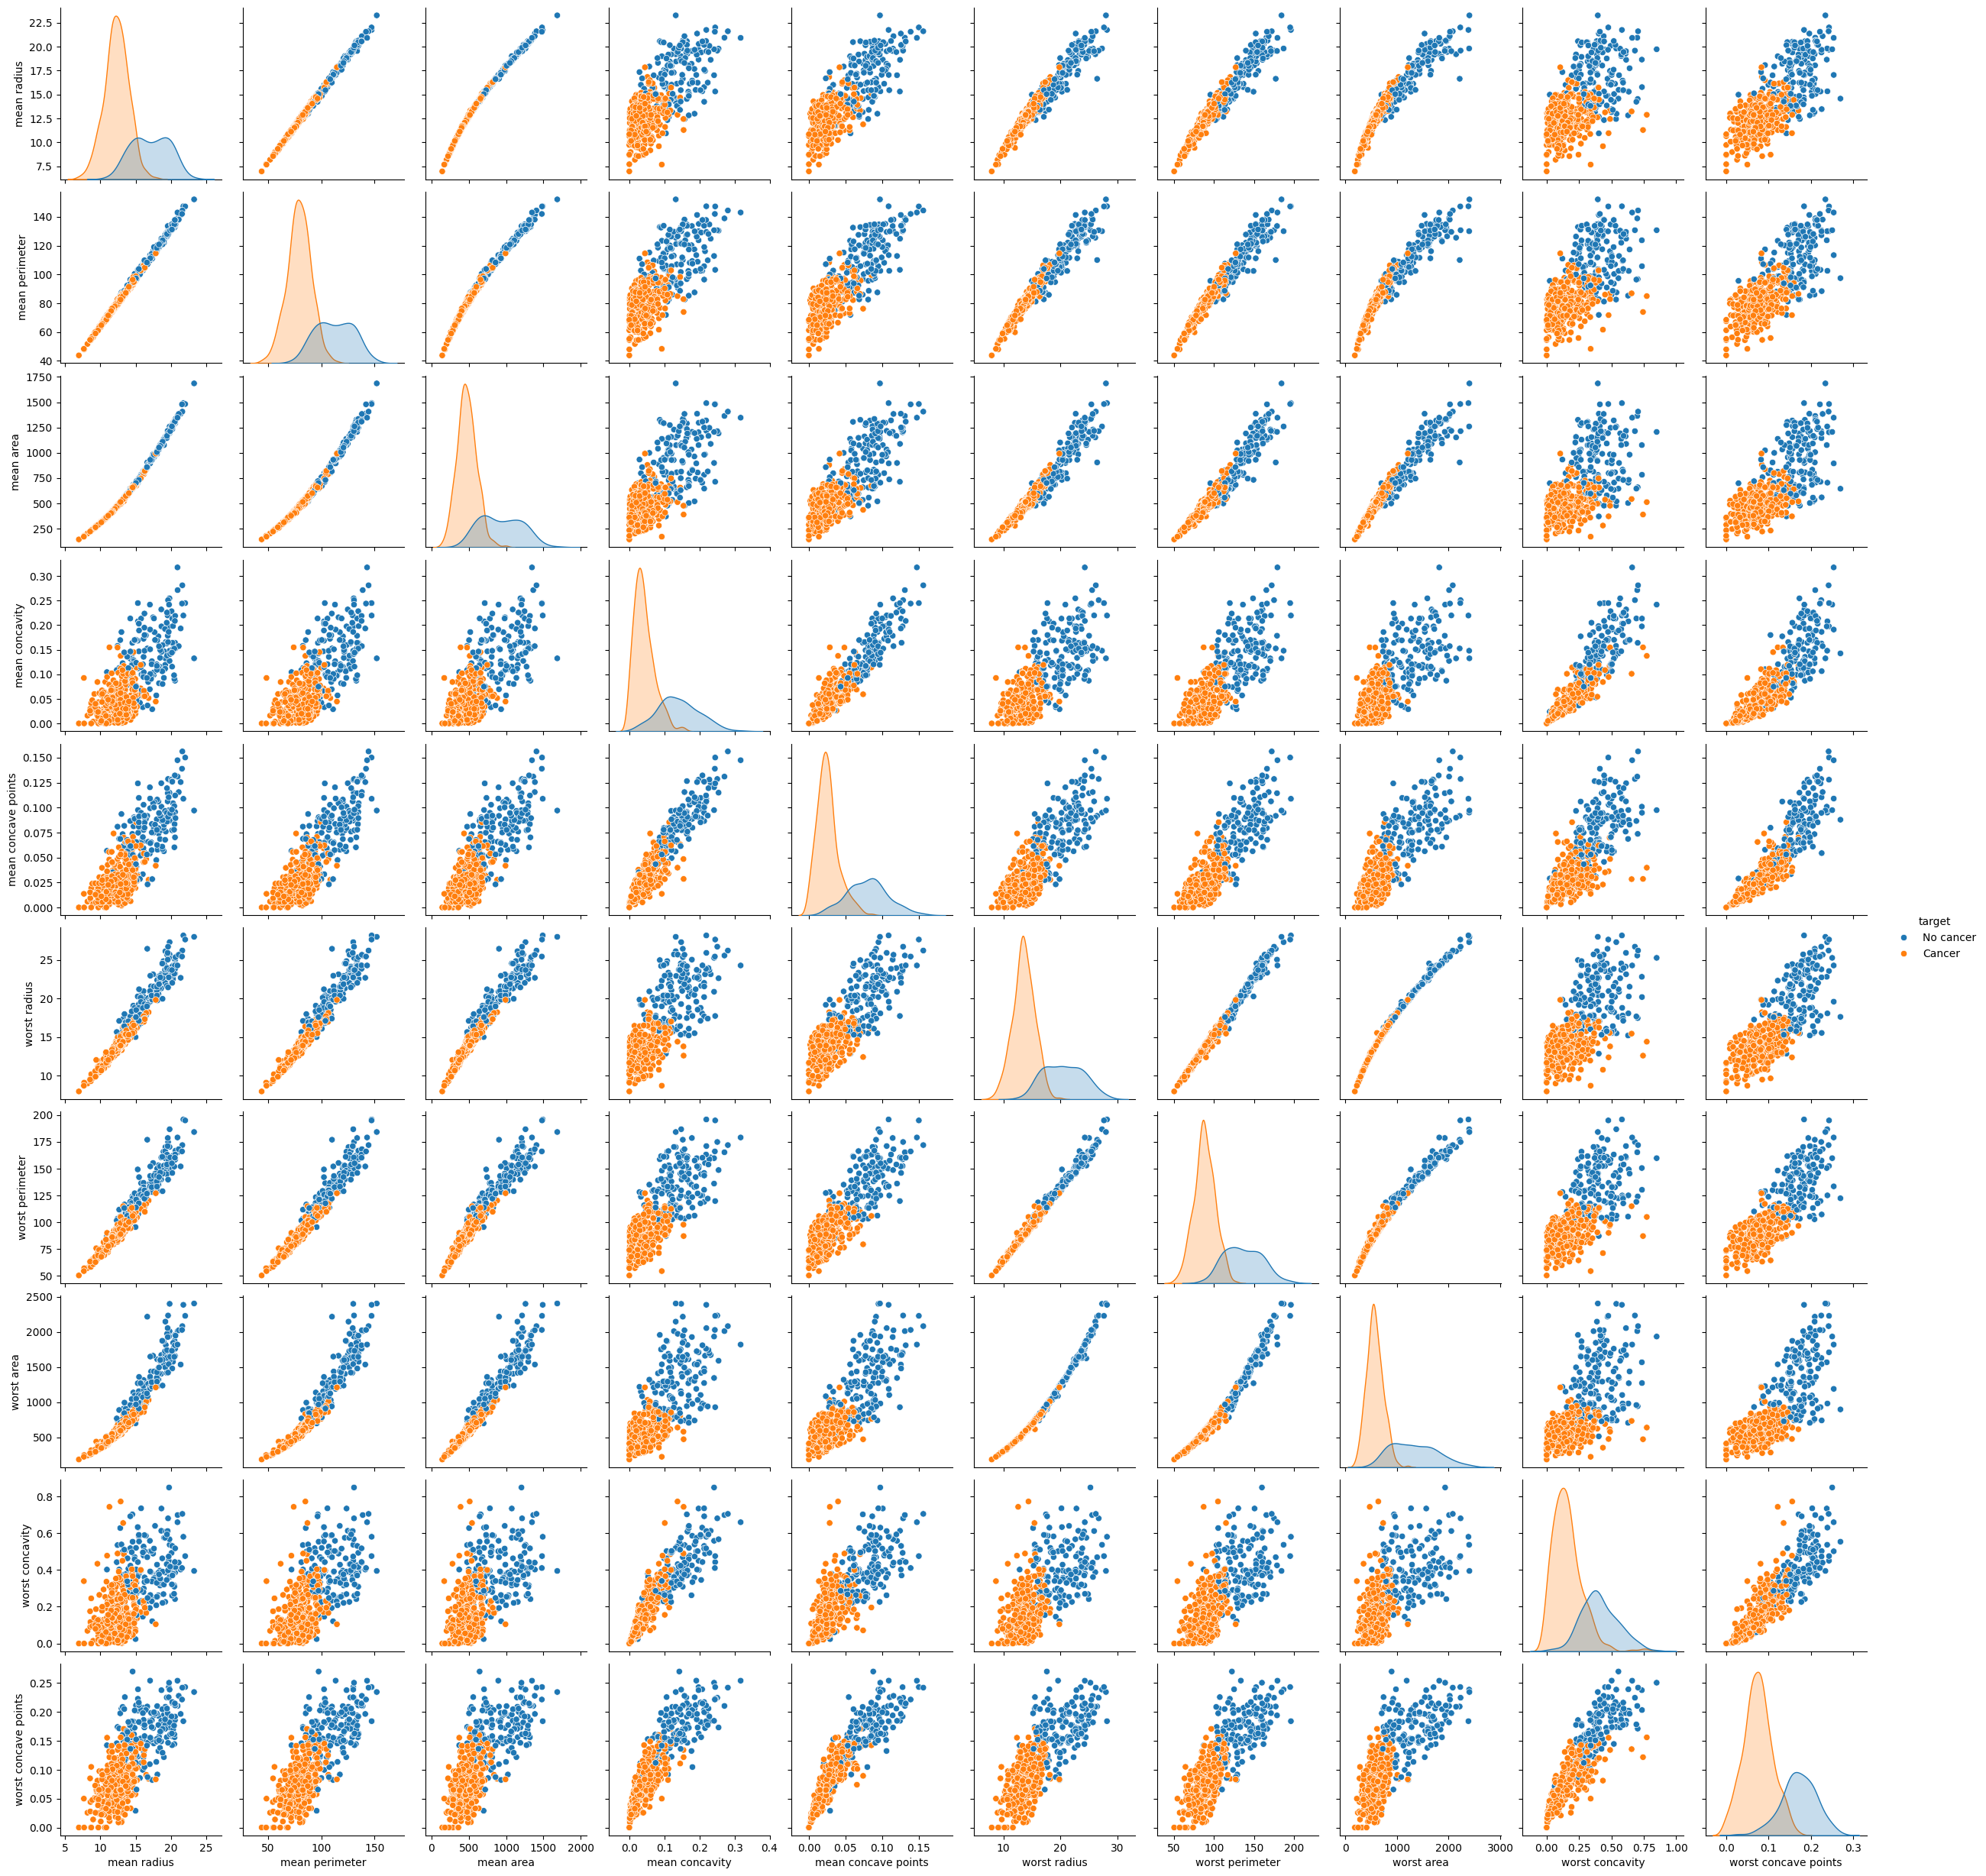

In [112]:
df_visual = X.copy()
df_visual['target'] = y

sns.pairplot(df_visual, hue='target', diag_kind='kde')
plt.show()

2. Boxplots to show distribution of features

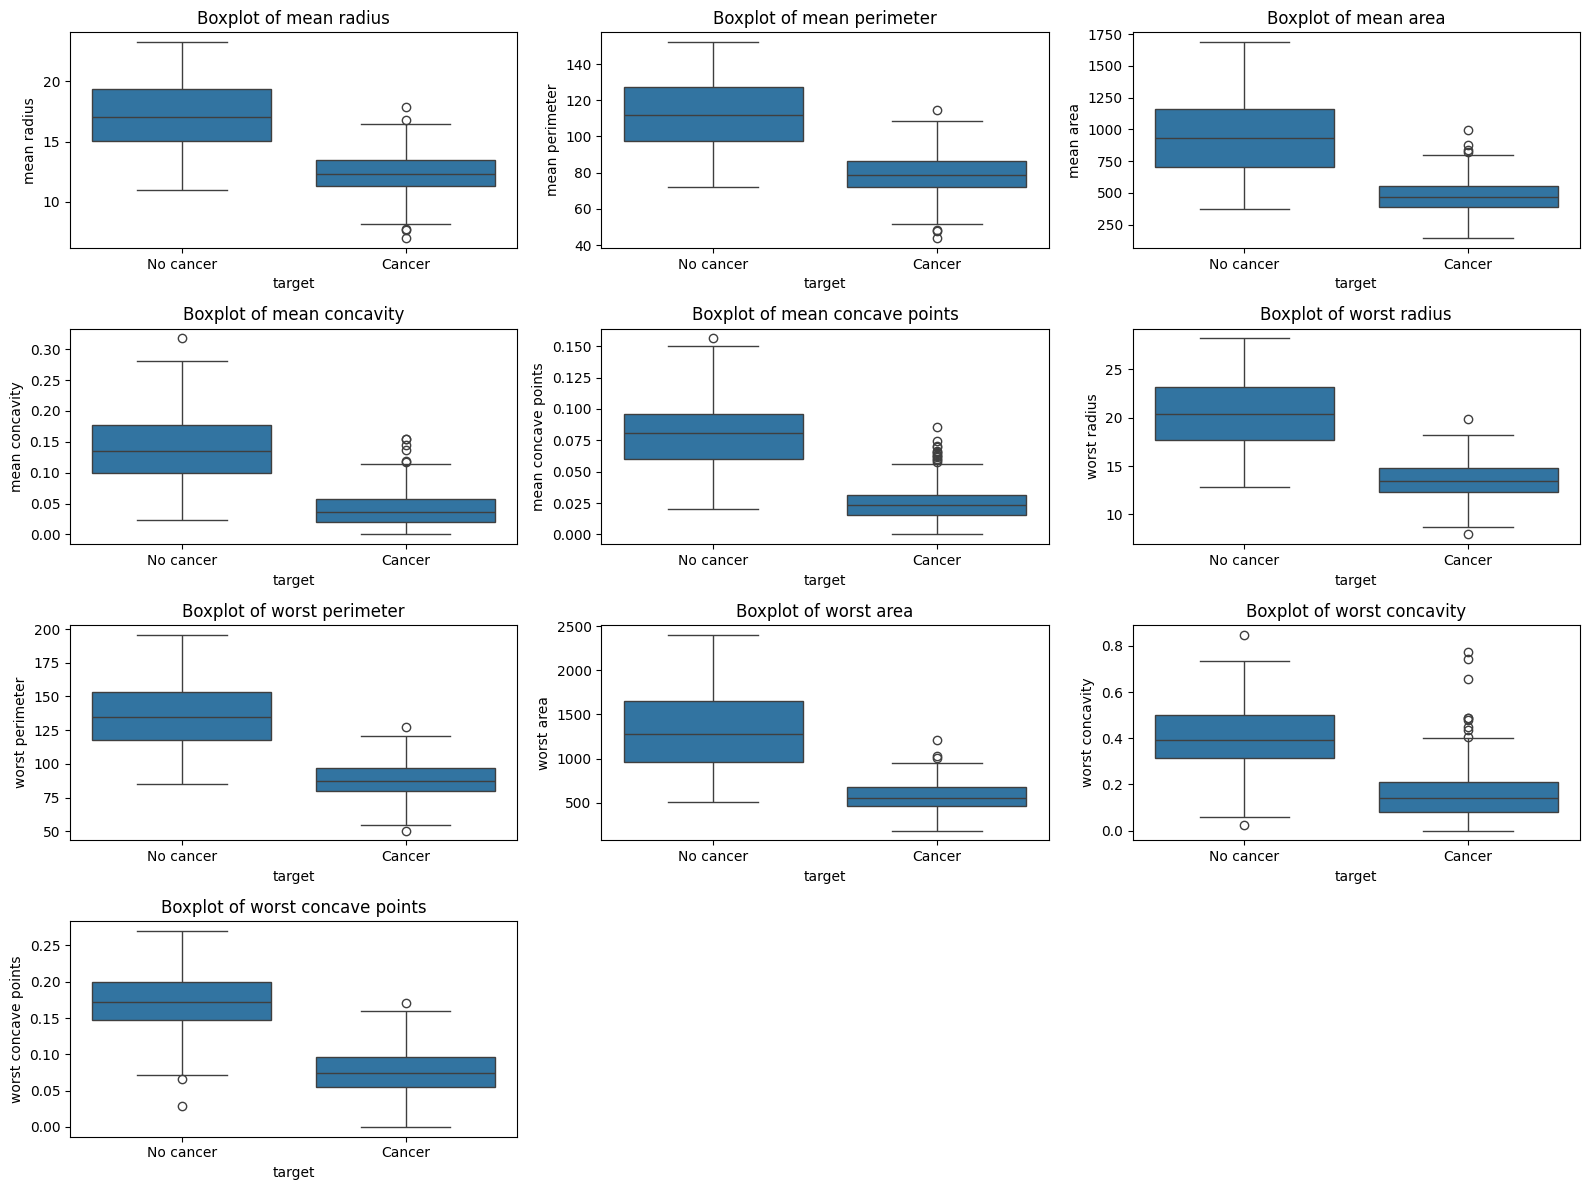

In [113]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='target', y=column, data=df_visual)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

3. Correlation Heatmap

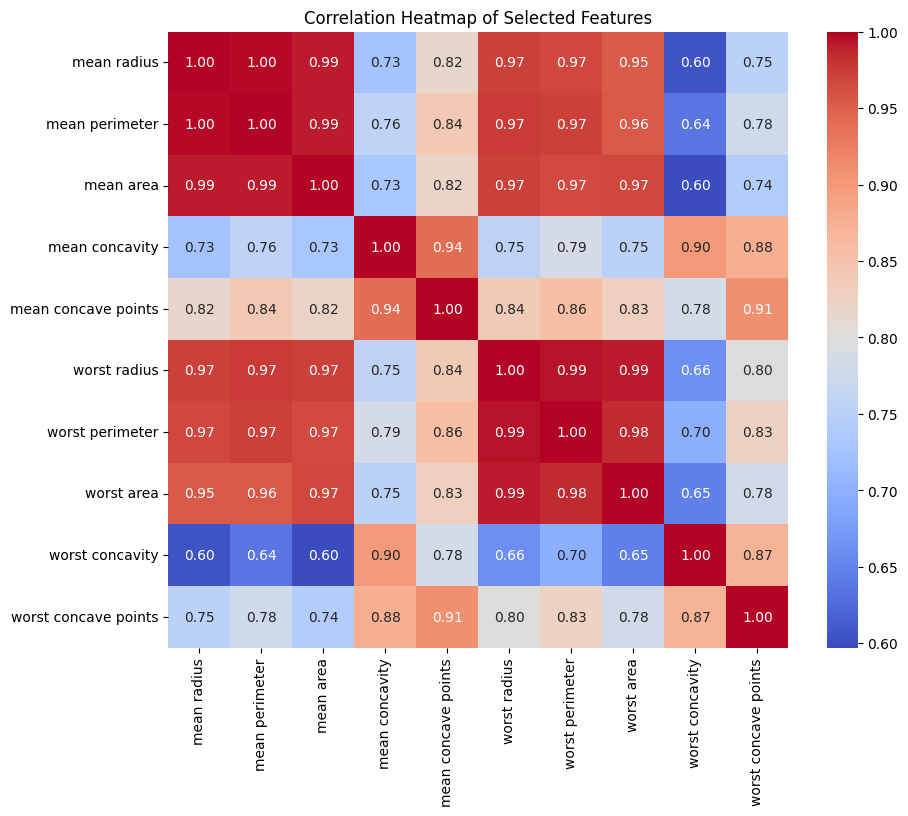

In [114]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# Data Preprocessing

Splitting the data with 80/20 method

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Pipelines

In [116]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

Fitting the models for prediction and evaluation

In [120]:
knn_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

* K-Nearest Neighbors

In [121]:
y_pred_knn = knn_pipeline.predict(X_test)
print(f'{'='*5} KNN Performance {'='*5}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(classification_report(y_test, y_pred_knn))
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_knn)}')
knn_cv_scores = cross_val_score(knn_pipeline, X, y, cv=5)
print(f'KNN Cross-Validation Scores: {knn_cv_scores}')
print()

===== KNN Performance =====
Accuracy: 0.9393939393939394
              precision    recall  f1-score   support

      Cancer       0.95      0.95      0.95        66
   No cancer       0.91      0.91      0.91        33

    accuracy                           0.94        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.94      0.94      0.94        99

Confusion Matrix:
 [[63  3]
 [ 3 30]]
KNN Cross-Validation Scores: [0.8989899  0.91919192 0.96969697 0.92929293 0.95959596]



* Random Forest

In [123]:
y_pred_rf = rf_pipeline.predict(X_test)
print(f'{'='*5} Random Forest Performance {'='*5}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}')
rf_cv_scores = cross_val_score(rf_pipeline, X, y, cv=5)
print(f'Random Forest Cross-Validation Scores: {rf_cv_scores}')
print()

===== Random Forest Performance =====
Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

      Cancer       0.94      0.92      0.93        66
   No cancer       0.85      0.88      0.87        33

    accuracy                           0.91        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.91      0.91      0.91        99

Confusion Matrix:
 [[61  5]
 [ 4 29]]
Random Forest Cross-Validation Scores: [0.90909091 0.90909091 0.97979798 0.94949495 0.96969697]



# Hyperparameter Tuning

* Setting hyperparameters

In [124]:
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_leaf': [2,3, 5]
}

In [127]:
knn_grid_search = GridSearchCV(knn_pipeline, param_grid_knn, cv=5)
rf_grid_search = GridSearchCV(rf_pipeline, param_grid_rf, cv=5)

knn_grid_search.fit(X, y)
rf_grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [2, 3, 5],
                         'rf__n_estimators': [50, 100, 200]})

In [128]:
print(f'Best KNN Parameters: {knn_grid_search.best_params_}\n'
      f'Best Score: {knn_grid_search.best_score_}')
print()
print(f'Best RF Parameters: {rf_grid_search.best_params_}\n'
      f'Best Score: {rf_grid_search.best_score_}')
print()

Best KNN Parameters: {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Best Score: 0.9393939393939392

Best RF Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 50}
Best Score: 0.9494949494949495



Checking feature importance for Random Forest

In [129]:
feature_importances = rf_pipeline.named_steps['rf'].feature_importances_
features_ = X.columns
importance_df = pd.DataFrame({
    'Features': features_,
    'Importances': feature_importances
})
importance_df = importance_df.sort_values(by='Importances', ascending=False)
print(importance_df)

               Features  Importances
7            worst area     0.232441
6       worst perimeter     0.198569
5          worst radius     0.165272
9  worst concave points     0.142736
4   mean concave points     0.068279
2             mean area     0.049884
8       worst concavity     0.038429
0           mean radius     0.036008
3        mean concavity     0.035172
1        mean perimeter     0.033211


# Re-fit with best parameters for KNN and Random Forest

In [130]:
best_knn = knn_pipeline.set_params(**knn_grid_search.best_params_)
best_rf = rf_pipeline.set_params(**rf_grid_search.best_params_)

best_knn.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(min_samples_leaf=3, n_estimators=50))])

Final prediction

In [131]:
y_pred_knn_final = best_knn.predict(X_test)
y_pred_rf_final = best_rf.predict(X_test)

In [132]:
y_pred_knn_final

array(['No cancer', 'No cancer', 'Cancer', 'No cancer', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer',
       'Cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'No cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer',
       'No cancer', 'Cancer', 'No cancer', 'Cancer', 'Cancer',
       'No cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'No cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer',
       'Cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer',
       'No cancer', 'Cancer', 'No cancer', 'Cancer', 'Cancer',
       'No cancer', 'Cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'No cancer',
       'Cancer', 'Cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer',
       'Cancer', 'Cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer',
       'Cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer',
       'No cancer', 'Cancer', 'Cancer', 'No canc

In [133]:
y_pred_rf_final

array(['No cancer', 'No cancer', 'Cancer', 'No cancer', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer',
       'Cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'No cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer',
       'No cancer', 'Cancer', 'No cancer', 'Cancer', 'Cancer',
       'No cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'No cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Cancer', 'No cancer', 'No cancer', 'Cancer', 'No cancer',
       'Cancer', 'No cancer', 'No cancer', 'Cancer', 'No cancer',
       'Cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer',
       'Cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer',
       'No cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer',
       'Cancer', 'Cancer', 'No canc

Final evaluation

In [134]:
print(f'{"="*5} Final KNN Performance {"="*5}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn_final)}')
print(classification_report(y_test, y_pred_knn_final))
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_knn_final)}')
print()

print(f'{"="*5} Final Random Forest Performance {"="*5}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf_final)}')
print(classification_report(y_test, y_pred_rf_final))
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf_final)}')

===== Final KNN Performance =====
Accuracy: 0.9494949494949495
              precision    recall  f1-score   support

      Cancer       0.97      0.95      0.96        66
   No cancer       0.91      0.94      0.93        33

    accuracy                           0.95        99
   macro avg       0.94      0.95      0.94        99
weighted avg       0.95      0.95      0.95        99

Confusion Matrix:
 [[63  3]
 [ 2 31]]

===== Final Random Forest Performance =====
Accuracy: 0.9292929292929293
              precision    recall  f1-score   support

      Cancer       0.97      0.92      0.95        66
   No cancer       0.86      0.94      0.90        33

    accuracy                           0.93        99
   macro avg       0.91      0.93      0.92        99
weighted avg       0.93      0.93      0.93        99

Confusion Matrix:
 [[61  5]
 [ 2 31]]


# Visualisation

In [136]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No cancer', 'Cancer'], 
                yticklabels=['No cancer', 'Cancer'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=['No cancer', 'Cancer'])
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['No cancer', 'Cancer'])

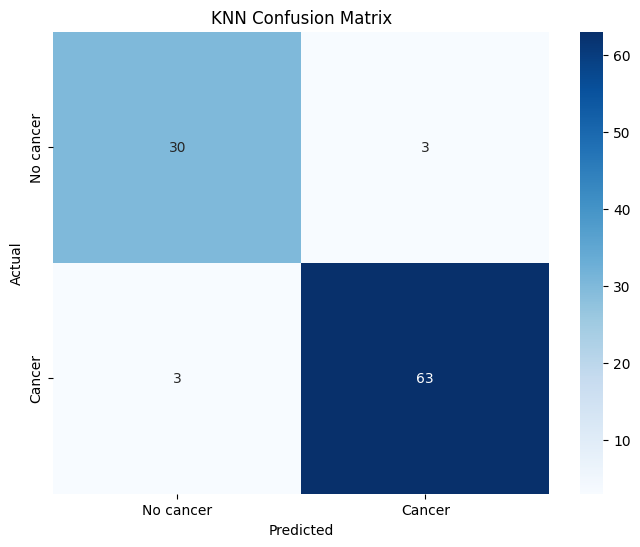

In [137]:
plot_confusion_matrix(cm_knn, 'KNN Confusion Matrix')

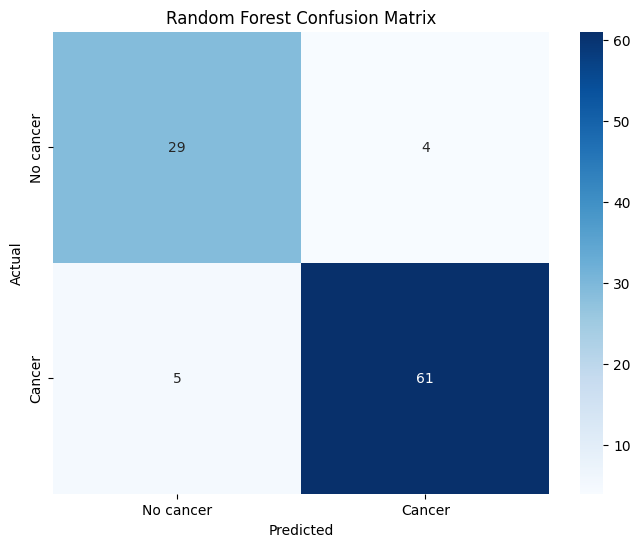

In [138]:
plot_confusion_matrix(cm_rf, 'Random Forest Confusion Matrix')